# Part 1

### Question 1

In [1]:
from astropy.table import Table, Column

t = Table()
t['1294_S1_L008_R1_001.fastq.gz'] = ['read 1']
t['1294_S1_L008_R2_001.fastq.gz'] = ['index 1']
t['1294_S1_L008_R4_001.fastq.gz'] = ['read 2']
t['1294_S1_L008_R3_001.fastq.gz'] = ['index 2']

table = {'read1':'1294_S1_L008_R1_001.fastq.gz', 'index1' : '1294_S1_L008_R2_001.fastq.gz', 'read2' :'1294_S1_L008_R4_001.fastq.gz', 'index2': '1294_S1_L008_R3_001.fastq.gz'}

for item in table:
    print(item, table[item], sep='\t')

read1	1294_S1_L008_R1_001.fastq.gz
index1	1294_S1_L008_R2_001.fastq.gz
read2	1294_S1_L008_R4_001.fastq.gz
index2	1294_S1_L008_R3_001.fastq.gz


In [2]:
file = '1294_S1_L008_R4_001.fastq.gz'

if file == '1294_S1_L008_R1_001.fastq.gz' or '1294_S1_L008_R4_001.fastq.gz':
    mean_scores = [0.0]*101
else:
    mean_scores = [0.0] *8

### Testing code for question 2, the script is also attached. 

In [39]:
import numpy as np

index = 'index_test.fq'
read = 'read_test.fq'

I made these test files using the following command

$ zcat /projects/bgmp/shared/2017_sequencing/1294_S1_L008_R1_001.fastq.gz | head -400 > read_test.fq

$ zcat /projects/bgmp/shared/2017_sequencing/1294_S1_L008_R2_001.fastq.gz | head -400 > index_test.fq

In [54]:
# This way, I can make the right index size later
files = {'1294_S1_L008_R1_001.fastq.gz': 'read', '1294_S1_L008_R2_001.fastq.gz':'index', '1294_S1_L008_R4_001.fastq.gz':'read', '1294_S1_L008_R3_001.fastq.gz':'index', 'index_test.fq': 'index', 'read_test.fq': 'read'}

In [55]:
def convert_phred(letter):
    """Converts a single character into a phred score"""
    phred = ord(letter)-33
    
    return phred
    

In [60]:

def populate_array(file):
    '''This function loops through a FASTQ file and converts the Phred quality score from a letter to its corresponding number. This function adds it to an ongoing sum of quality scores for each position'''
    LN = 0
    number_quality = 0
    if files[file] == 'read':
        scores = np.zeros(shape=(101,1))
    elif files[file] == 'index':
        scores = np.zeros(shape=(8,1))
    
    with open(file, 'r') as fh:
        for line in fh:
            line = line.strip()
            LN +=1
            
            #print(LN)
            if LN%4 == 0:
                number_quality += 1 #helps calculate the mean after summing scores
                for position in range(len(line)):
                    scores[position] += convert_phred(line[position])
        
    return scores, LN, number_quality

In [65]:
# Run populate_array function in this cell
scores_sum, NR, NQ = populate_array(index)

In [66]:
print(type(scores_sum), NR, NQ) #checks to make sure I'm using a numpy array

<class 'numpy.ndarray'> 400 100


In [67]:
# Calculating the mean quality score 
mean_scores = scores_sum/NQ

print(mean_scores)

[[ 2.  ]
 [31.3 ]
 [31.35]
 [34.4 ]
 [35.4 ]
 [38.88]
 [38.9 ]
 [37.75]]


Text(0.5,1,'Mean Quality Scores from Illumina Sequencing')

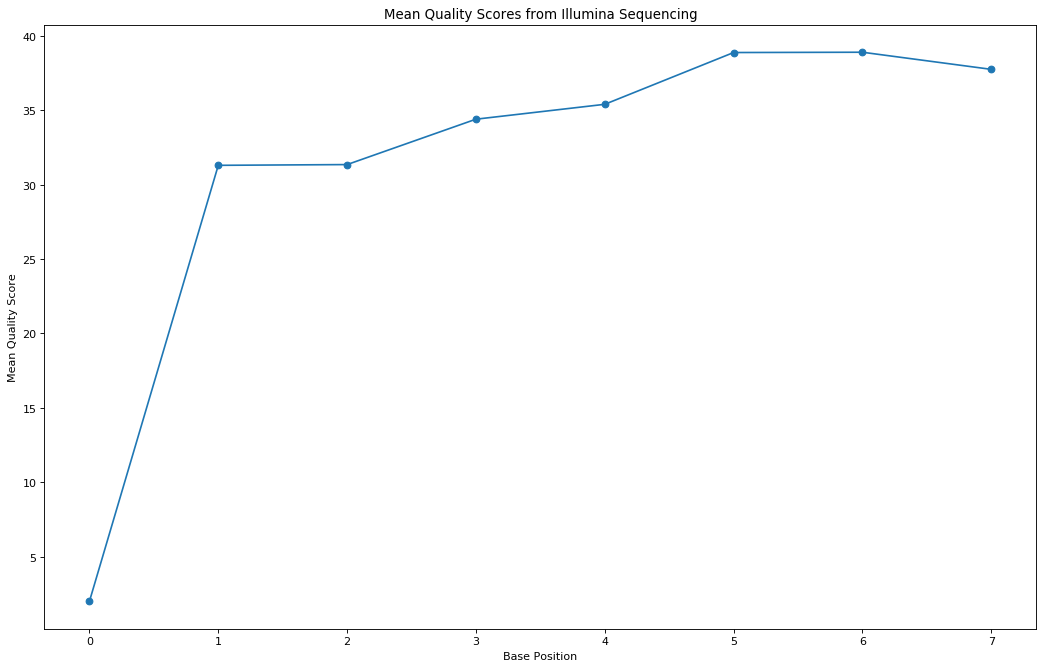

In [69]:
#Plot Mean
import matplotlib.pyplot as plt

y = mean_scores.tolist()
x = range(len(mean_scores))

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(x, y, marker='o')
plt.xlabel('Base Position')
plt.ylabel('Mean Quality Score')
plt.title('Mean Quality Scores from Illumina Sequencing')

### Part 2 part a is in these files:

+ Hopefully

In [2]:
into = 'mean_/projects/bgmp/shared/2017_sequencing/1294_S1_L008_R3_001.fastq.gz.tsv'

into=into.strip().split('/')[-1]
print(into)

1294_S1_L008_R3_001.fastq.gz.tsv


### Part 2b)
+ What is a good quality score cutoff for index reads and pairs to utilize for sample identification and downstream analysis, respectively?

    + I think any read that has an undetermined base (N) should not be used for sample identification and downstream analysis. 
    + 

### Part 2c)
+ The number of indices that have Undetermined (N) base calls: **3976613** in R2, **3328051** in R3. 

$ zcat 1294_S1_L008_R2_001.fastq.gz |sed -n '2~4p' | grep 'N' | wc -l

$ zcat 1294_S1_L008_R3_001.fastq.gz |sed -n '2~4p' | grep 'N' | wc -l

# Part 2

# Files

The files to be demultiplexed are in: /projects/bgmp/shared/2017_sequencing

Read 1 file goes with Index 1

Read 2 file goes with Index 2

The headers should be identical if the index and the reads really match

### Goals:

+ How much index swapping is occurring?
+ Separate reads by index (demultiplex)
+ If the index is undetermined (eg 'N' in the sequence) separate those out. 

### Input:

+ 2 Biological reads with 2 index reads
+ Each of these files contains info from a whole lane, there are 400 million x 4 lines 

Read then index Group 1 (1 and 2):

 1294_S1_L008_R1_001.fastq.gz
 
 1294_S1_L008_R2_001.fastq.gz
 
Read then index Group 2 (3 and 4): 

 1294_S1_L008_R4_001.fastq.gz
 
 1294_S1_L008_R3_001.fastq.gz 
 
 ### Output:
 + One forward, one reverse file per index (24 indices) 
 + One forward, one reverse file per unknown index, low quality, or swapped index pairs (1)
 + Number of properly matched indices per index
 + Level of index swapping observed (percentage of total reads that have swapped indices).
 
 #### Notes:
 + Use numpy when calculating things
 
 + $ zcat 1294_S1_L008_R4_001.fastq.gz | sed -n '1~4p'|wc -l gives the number of reads which is:
 
 363,246,735
 

# PLN

### 1. Sorting the Indices

+ Undetermined: If there is an N in the index, note that in something that is faster to iterate over than a list. Count these. 
    
+ Unswapped: If it doesn't have an N, Compare index files (1294_S1_L008_R2_001.fastq.gz and 1294_S1_L008_R3_001.fastq.gz), and if they are the same, note that. Count these separately.

+ Swapped: If they are not the same, and thus have some index swapping, note that.  

+ Make sure that all these options, either 'Undetermined', 'Unswapped', or 'Swapped' are saved into the same data structure. 
    + I'm thinking a numpy array of strings would work since we know the number of reads in all the files, and indexing would be super fast.

### 2. Aligning index with sequence reads

Fits into 'Unswapped' step of sorting the indices

+ while iterating through the index file, make a dictionary with the read unique part of the header "@K00337:83:HJKJNBBXX:8:1101:**1265**:1191" with the value as the name of the index (B1, A5 etc). OR "undetermined" if there are Ns.
    + Should have a dictionary with keys as index sequence and values as the name of the index. 


### 3. Making appropriate read files

Define a function for this step

For each read file:

+ Go through each line of the read file, counting the number of entries. 
+ For the read, look up the corresponding position in the sorted index output
+ Write 'Undetermined' and 'Swapped' to its own file, r1_und
+ Write the 'Unswapped' entire entry to files named r1_ind_{index name}.fq using the dictionary created in the previous step. 


# Unit tests

What should be in the input files?

   + 4 separate files, two with indexes, two with reads
   + Each file should have 6 entries
   + 2 should be swapped, 3 should be unswapped, 1 should be undetermined. 
   + Need to be in fastq format
   + Needs similar header lines to the actual files
    
How should I make the input files? 

   + Pick the first six entries from each file and modify so it matches the above. Only the index files needed to be changed. 
   + file names: 
       + index_test_1.txt  
       + index_test_2.txt
       + read_test_1.txt  
       + read_test_2.txt
   + They are text files because my text editor doesn't like opening .fqs for some reason, but it is in the correct format. 
    
Expected output:

   + forward.txt 